Pertama-tama kita harus menghubungkan google colab dengan kaggle.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asyfanabilla","key":"b1bc6b280d5b450963cadd8a53557d8c"}'}

Kita buat direktori dan izin (permission) menggunakan script di bawah!

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Tahap ini kita coba untuk memanggil url dataset yang kita gunakan, dataset diambil dari kaggle, yaaa..

In [ ]:
!kaggle datasets download -d suyashlakhani/apple-stock-prices-20152020

  0% 0.00/66.9k [00:00<?, ?B/s]
100% 66.9k/66.9k [00:00<00:00, 59.1MB/s]


Selanjutnya jangan lupa ekstrak dataset yang sudah didownload dengan script seperti di bawah.

In [ ]:
!mkdir apple-stock-prices-20152020
!unzip apple-stock-prices-20152020.zip -d apple-stock-prices-20152020
!ls apple-stock-prices-20152020

Archive:  apple-stock-prices-20152020.zip
  inflating: apple-stock-prices-20152020/AAPL.csv  
AAPL.csv


Selanjutnya kita deklarasikan library yang kita gunakan..

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Di tahap ini kita coba untuk memanggil dataset dan menampilkan isi dari dataset.

In [8]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


Kita cek heatmap untuk melihat data yang kosong, yuk!

<Axes: >

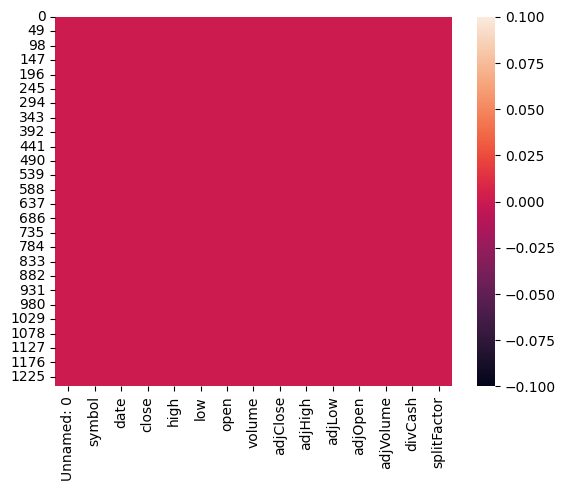

In [10]:
sns.heatmap(df.isnull())

Berikutnya kita langsung cek detail dari datasetnya dengan script di bawah ini.

In [11]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


Kita gambarkan visualisasi heatmapnya..

<ipython-input-11-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

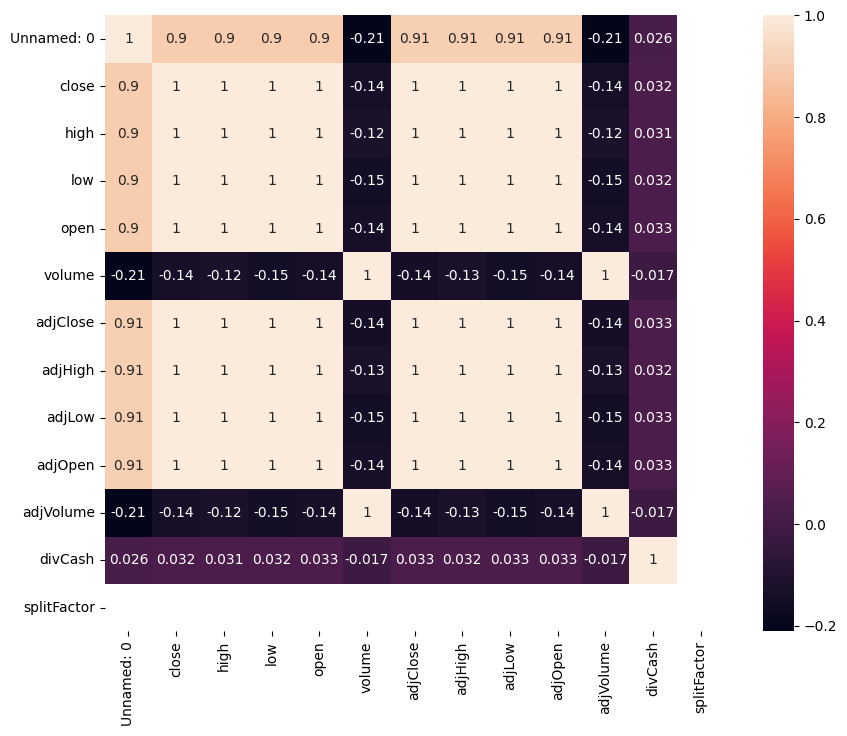

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Kita tampilkan harga opening berdasarkan merknya.

In [12]:
models = df.groupby('symbol').count()[['open']].sort_values(by='open', ascending=True).reset_index()

([0], [Text(0, 0, 'AAPL')])

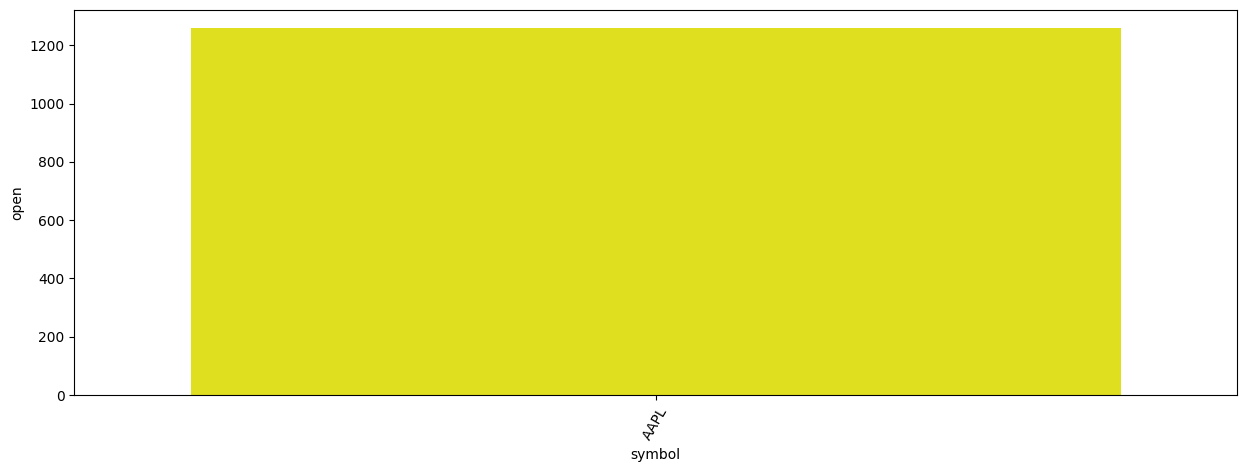

In [13]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['symbol'], y=models['open'], color='yellow')
plt.xticks(rotation=60)

Dan ini adalah informasi harga klosing.

In [14]:
Id = df.groupby('symbol').count()[['close']].sort_values(by='close').reset_index()

<Axes: xlabel='symbol', ylabel='close'>

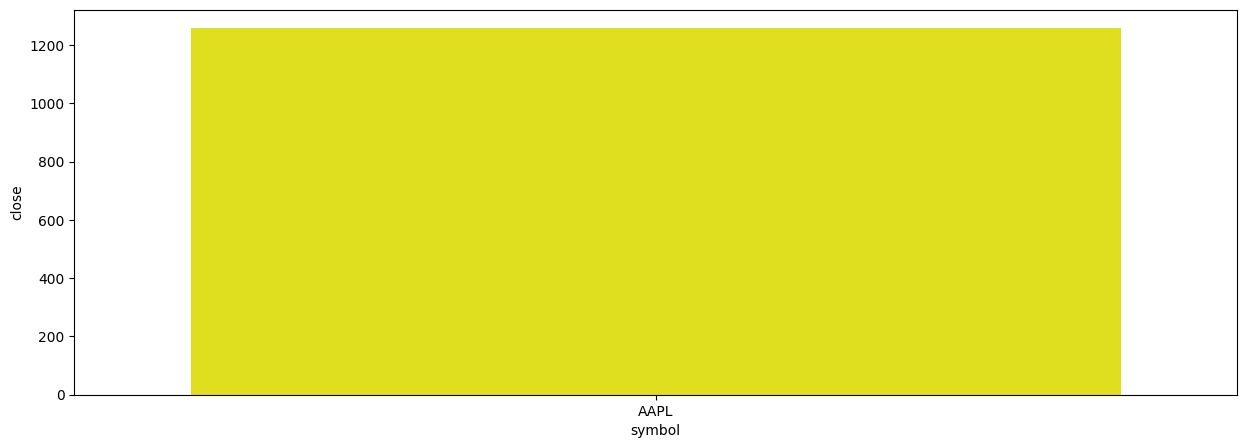

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=Id['symbol'], y=Id['close'], color='yellow')

Di sini kita menampilkan distribusi dari harga tertinggi.

C:\Users\asyfa nabilla\AppData\Local\Temp\ipykernel_11940\2749266106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['high'])


<Axes: xlabel='high', ylabel='Density'>

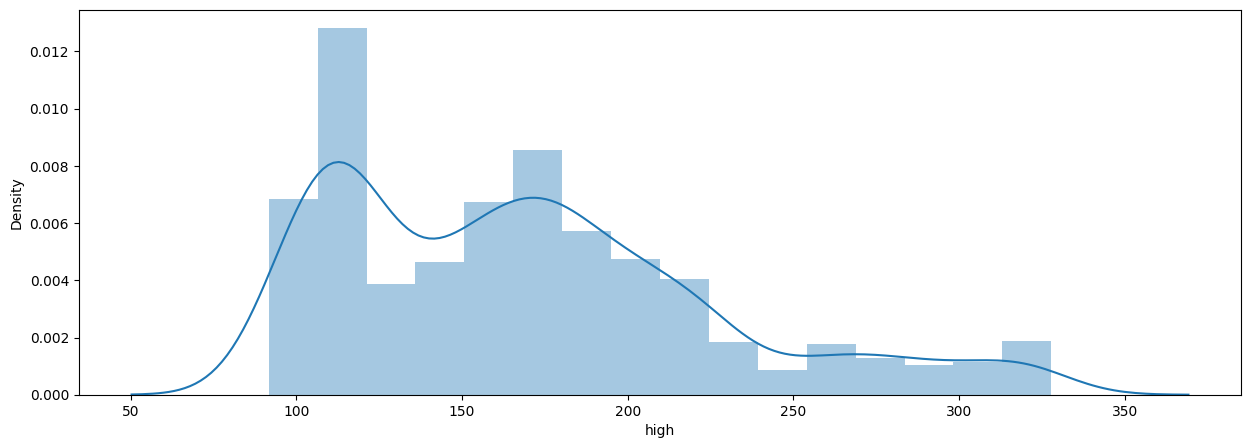

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(df['high'])

Dan ini adalah tampilan dari distribusi harga terendah.

C:\Users\asyfa nabilla\AppData\Local\Temp\ipykernel_11940\3929078552.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['low'])


<Axes: xlabel='low', ylabel='Density'>

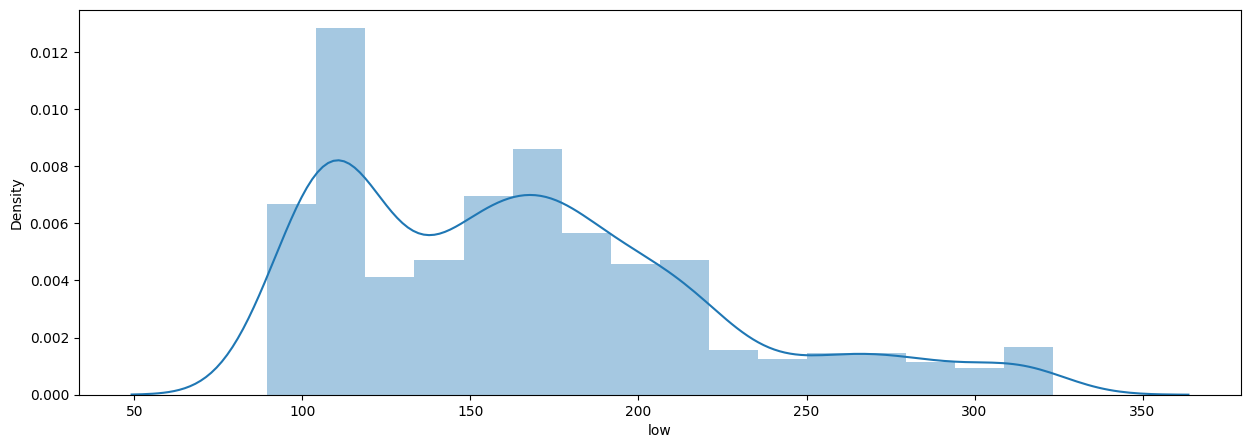

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['low'])

## **MODELING**

Setelah melakukan analisis data, kita lanjut ke modeling.. karena sebelumnya kita sudah import library di atas maka selanjutnya kita akan langsung memilih atribut mana saja yang akan dijadikan label.

In [18]:
features = ['close', 'low', 'open', 'volume', 'adjClose', 'adjLow', 'adjOpen', 'adjVolume']
x = df[features]
y = df['high']
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1258, 8)
Shape of y: (1258,)


Kita lakukan split data di sini, yuk! Scriptnya seperti di bawah ini.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(315,)

Selanjutnya kita masukan data training dan testing ke dalam model regresi linier.

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

Di tahap ini kita menampilkan tingkat estimasi akurasi.

In [21]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9994546493527267


Dannnn... di sini kita coba model estimasi menggunakan regresi linier ini dengan memasukan inputan data terbaru.

In [27]:
input_data = np.array([[132.045, 130.05, 130.34, 45833246, 121.682558, 119.844118, 120.111360, 45833246]])

prediction = lr.predict(input_data)
print('estimasi apple stock :', prediction)

estimasi apple stock : [132.28638882]


c:\Users\asyfa nabilla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.metrics import r2_score

In [31]:
x = ([132.045, 130.05, 130.34, 45833246, 121.682558, 119.844118, 120.111360, 45833246]) 
y = ([131.780, 131.10, 131.86, 30733309, 121.438354, 120.811718, 121.512076, 30733309]) 

In [32]:
r_squared = r2_score(x, y)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.855279465718603


Selanjutnya simpan model menggunakan pickle!

In [ ]:
import pickle

filename = 'estimasi_apple.sav'
pickle.dump(lr, open(filename,'wb'))